In [1]:
!pip install -U fastai duckduckgo_search

In [7]:
# from duckduckgo_search import ddg_images
# import duckduckgo_search as dds
from duckduckgo_search import DDGS
from fastcore.all import *

dir(DDGS)

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    ddgs = DDGS()
    return L(ddgs.images(keywords=term, max_results=max_images)).itemgot('image')

In [11]:
url = search_images('bird', max_images=1)

Searching for 'bird'


In [12]:
url

(#1) ['http://hdqwalls.com/download/1/colorful-parrot-bird.jpg']

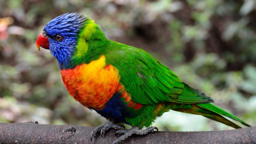

In [14]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(url[0], dest, show_progress=True)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos'


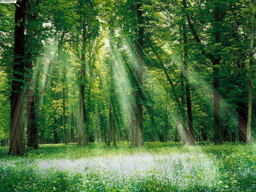

In [24]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=True)
Image.open('forest.jpg').to_thumb(256,256)

In [17]:
!ping 8.8.8.8

PING 8.8.8.8 (8.8.8.8): 56 data bytes
64 bytes from 8.8.8.8: icmp_seq=0 ttl=114 time=707.356 ms
64 bytes from 8.8.8.8: icmp_seq=1 ttl=114 time=439.775 ms
Request timeout for icmp_seq 2
64 bytes from 8.8.8.8: icmp_seq=2 ttl=114 time=1005.418 ms
^C

--- 8.8.8.8 ping statistics ---
5 packets transmitted, 3 packets received, 40.0% packet loss
round-trip min/avg/max/stddev = 439.775/717.516/1005.418/231.035 ms


In [22]:
!ping 8.8.8.8

PING 8.8.8.8 (8.8.8.8): 56 data bytes
64 bytes from 8.8.8.8: icmp_seq=0 ttl=116 time=325.688 ms
64 bytes from 8.8.8.8: icmp_seq=1 ttl=116 time=736.293 ms
64 bytes from 8.8.8.8: icmp_seq=2 ttl=116 time=79.507 ms
64 bytes from 8.8.8.8: icmp_seq=3 ttl=116 time=888.414 ms
64 bytes from 8.8.8.8: icmp_seq=4 ttl=116 time=992.370 ms
64 bytes from 8.8.8.8: icmp_seq=5 ttl=116 time=961.916 ms
64 bytes from 8.8.8.8: icmp_seq=6 ttl=116 time=376.043 ms
64 bytes from 8.8.8.8: icmp_seq=7 ttl=116 time=227.539 ms
^C

--- 8.8.8.8 ping statistics ---
9 packets transmitted, 8 packets received, 11.1% packet loss
round-trip min/avg/max/stddev = 79.507/573.471/992.370/338.399 ms


In [33]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [34]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

36

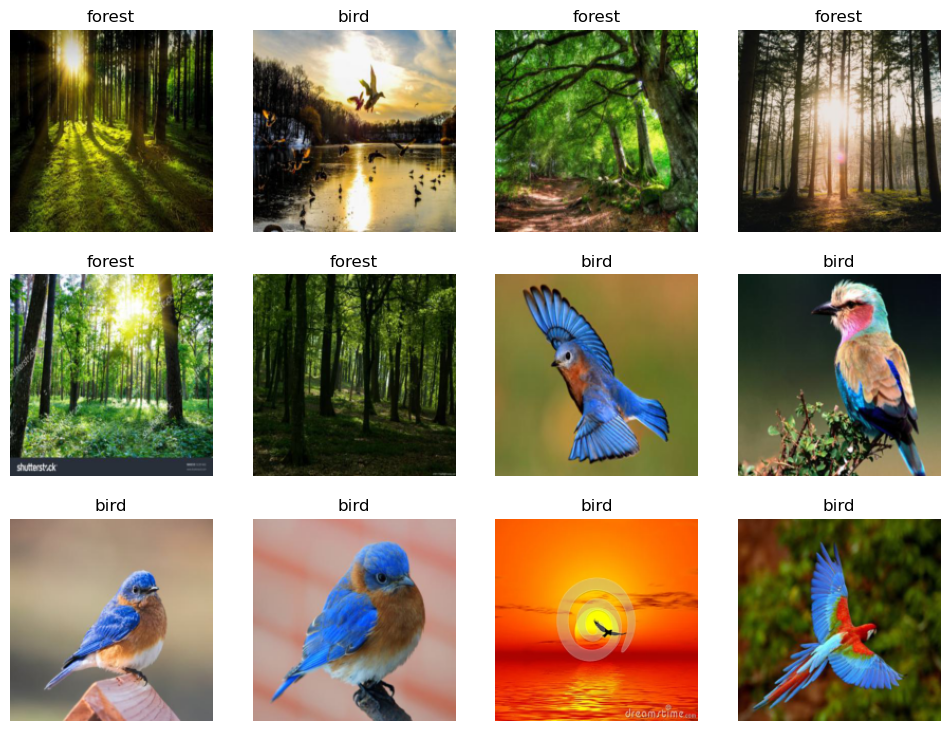

In [36]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [43]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.930522,0.233822,0.125000,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.247050,0.076472,0.000000,00:01
1,0.213506,0.094284,0.041667,00:01


In [47]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9967
